In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns



# Exploring dataset and its dimensionality

In [3]:
df = pd.read_csv("/content/drive/MyDrive/datasets/lung_cancer_mortality_data_large_v2.csv")

In [4]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0


In [5]:
df.shape

(3250000, 18)

# Looking out for NULL values

In [6]:
df.isna().sum()

,0
id,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
beginning_of_treatment_date,0
family_history,0
smoking_status,0
bmi,0


In [7]:
# def datediff(x, y):
#     date_x = datetime.strptime(x, "%Y-%m-%d")
#     date_y = datetime.strptime(y, "%Y-%m-%d")
#     diff = date_y - date_x

#     return diff.days

In [8]:
def datediff(start_date, end_date):
    start = datetime.strptime(start_date, "%Y-%m-%d")
    end = datetime.strptime(end_date, "%Y-%m-%d")
    diff = end - start

    return diff.days

# Calculating the total number of days for treatment despite the outcome

 This operation is crucial for understanding treatment timelines and can aid in various analyses, such as evaluating treatment effectiveness or resource allocation.

In [9]:
df["days_of_treatment"] = 0 #providing a clear starting point for further calculations.

for i in range(df.shape[0]):
    df.iloc[i, -1] = datediff(df.iloc[i, 4], df.iloc[i, -3])

df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,days_of_treatment
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0,587
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0,369
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0,704
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1,432
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0,294


# Calculating the number of days for the diagnosis period


In [10]:
df["diagnosis_period"] = 0

for i in range(df.shape[0]):
    df.iloc[i, -1] = datediff(df.iloc[i, 4], df.iloc[i, 6])

df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,days_of_treatment,diagnosis_period
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0,587,14
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0,369,10
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0,704,5
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1,432,6
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0,294,2


# Ratio of fatal and successful outcomes

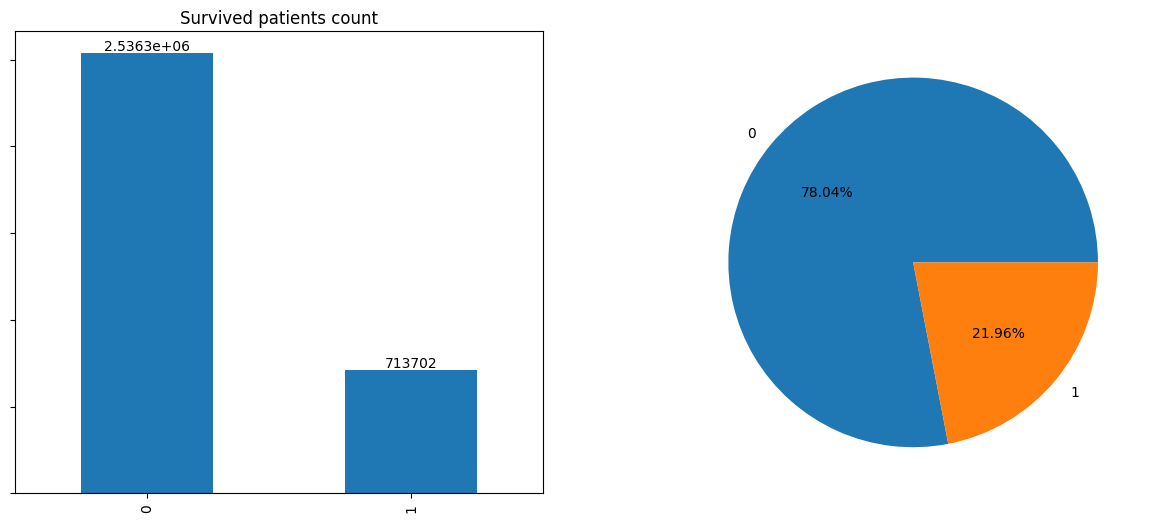

In [11]:
count = df["survived"].value_counts()
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
count.plot(kind="bar", ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")
axes[0].set_title("Survived patients count")
count.plot(kind="pie", ax=axes[1], autopct="%0.2f%%")
axes[1].set_ylabel("")
plt.show()

# Average time to start treatment

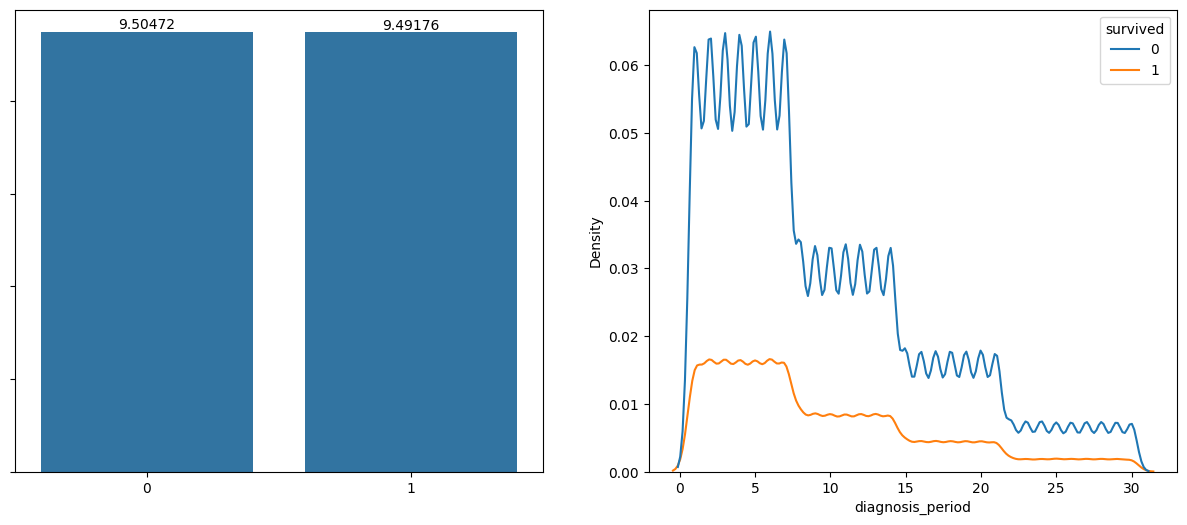

In [12]:
grouped = df.groupby("survived")
mean = grouped["diagnosis_period"].mean()
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.barplot(x=mean.index, y=mean, ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")

sns.kdeplot(df, x="diagnosis_period", hue="survived", ax=axes[1])

plt.show()

# Top countries with highest average time to start treatment and lowest average time to start treatment

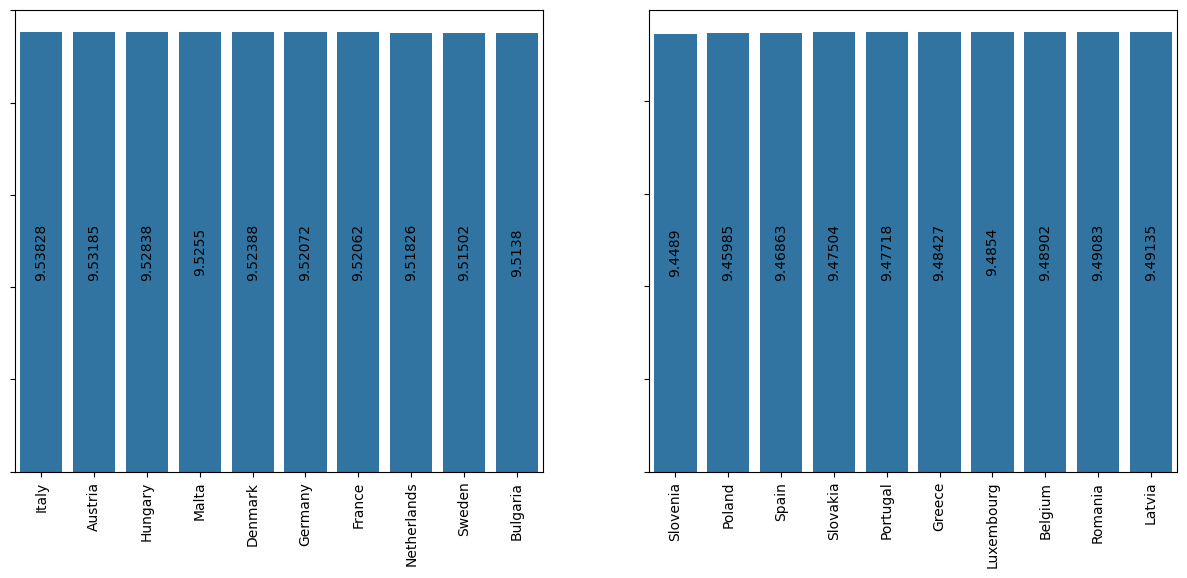

In [13]:
grouped = df.groupby("country")
mean = pd.DataFrame(grouped["diagnosis_period"].mean())
mean = mean.sort_values("diagnosis_period", ascending=False)
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.barplot(x=mean.index[:10], y=mean.iloc[:10, 0], ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container, rotation=90, label_type="center")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")


mean = mean.sort_values("diagnosis_period", ascending=True)
sns.barplot(x=mean.index[:10], y=mean.iloc[:10, 0], ax=axes[1])
for container in axes[1].containers:
    axes[1].bar_label(container, rotation=90, label_type="center")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_yticklabels(())
axes[1].set_ylabel("")
axes[1].set_xlabel("")


plt.show()

# Average time of treatment in days and days distribution for each outcome

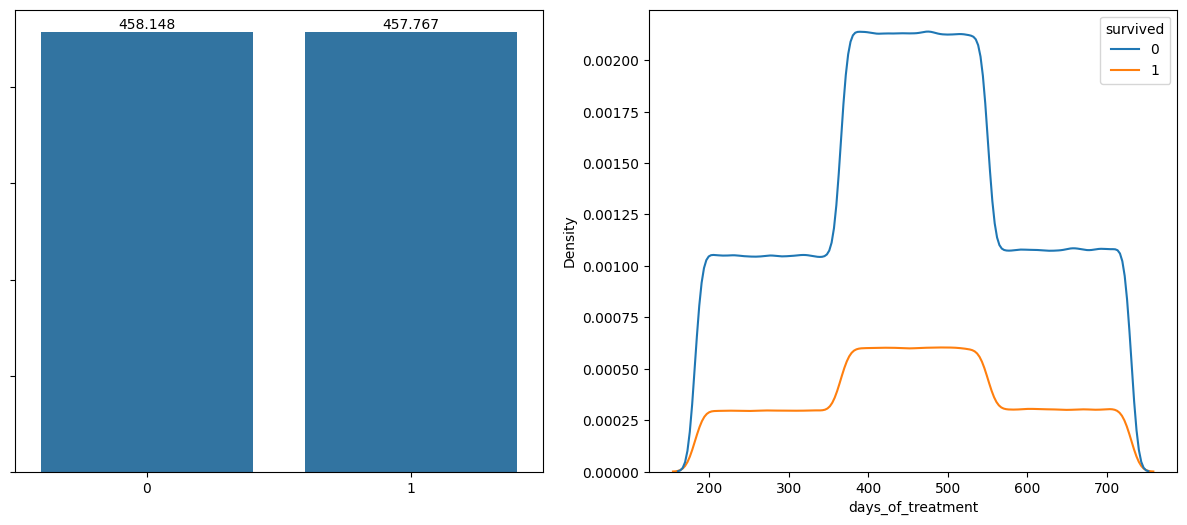

In [14]:
grouped = df.groupby("survived")
mean = grouped["days_of_treatment"].mean()
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.barplot(x=mean.index, y=mean, ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")

sns.kdeplot(df, x="days_of_treatment", hue="survived", ax=axes[1])

plt.show()

# Average age for both outcomes and age distribution through density curve

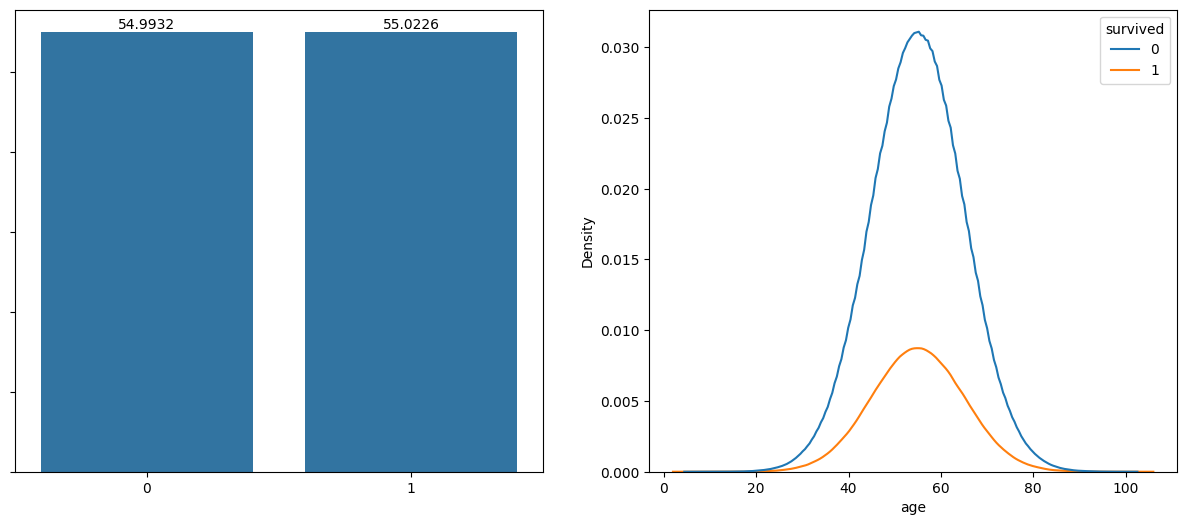

In [15]:
grouped = df.groupby("survived")
mean = grouped["age"].mean()
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.barplot(x=mean.index, y=mean, ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")

sns.kdeplot(df, x="age", hue="survived", ax=axes[1])

plt.show()

In [16]:
survived_df = df[df["survived"] == 1].copy()
dead_df = df[df["survived"] == 0].copy()


In [17]:
df.shape

(3250000, 20)

In [18]:
survived_df.shape


(713702, 20)

In [19]:
dead_df.shape

(2536298, 20)

# Countires count for each outcome

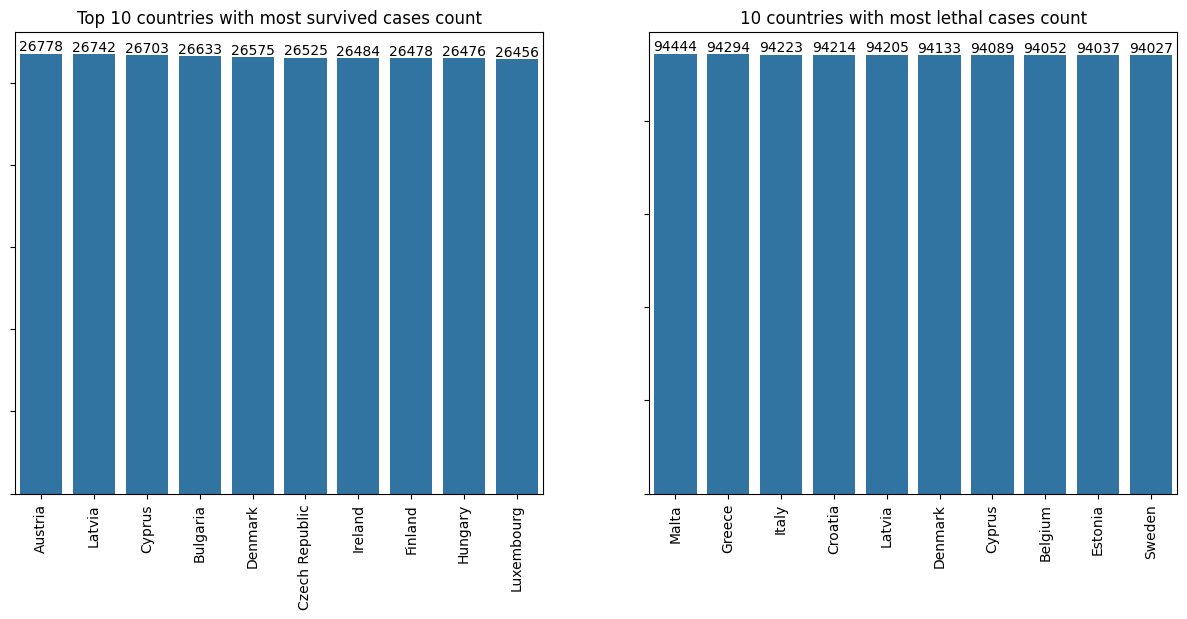

In [20]:
survived_count = pd.DataFrame(survived_df["country"].value_counts()).sort_values("count", ascending=False)
dead_count = pd.DataFrame(dead_df["country"].value_counts()).sort_values("count", ascending=False)

fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

sns.barplot(x=survived_count.index[:10], y=survived_count.iloc[:10, 0], ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")
axes[0].set_title("Top 10 countries with most survived cases count")
sns.barplot(x=dead_count.index[:10], y=dead_count.iloc[:10, 0], ax=axes[1])

for container in axes[1].containers:
    axes[1].bar_label(container)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_yticklabels(())
axes[1].set_ylabel("")
axes[1].set_xlabel("")
axes[1].set_title("10 countries with most lethal cases count")

plt.show()

# Countries count with highest number of the following smoking statuses

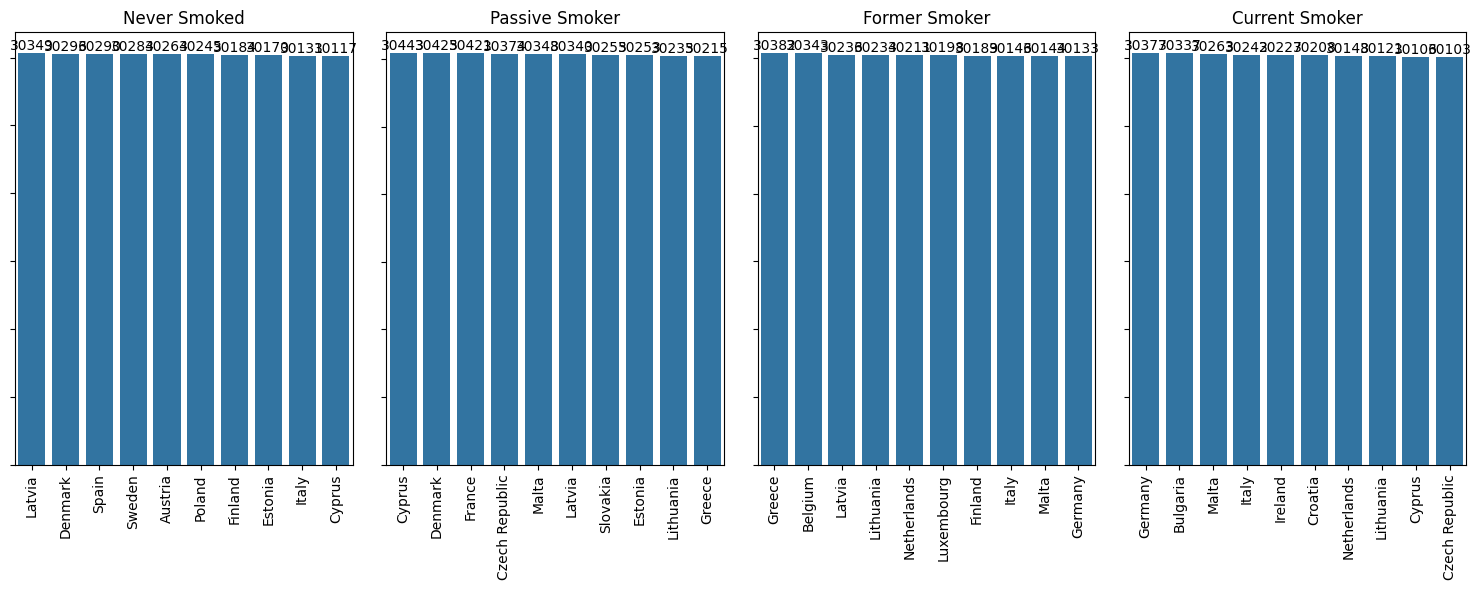

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))
for i, j in enumerate(df["smoking_status"].unique()):
    temp_df = df[df["smoking_status"] == j]
    count = pd.DataFrame(temp_df["country"].value_counts()).sort_values("count", ascending=False)
    sns.barplot(x=count.index[:10], y=count.iloc[:10, 0], ax=axes[i])
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_yticklabels(())
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    axes[i].set_title(j)
plt.tight_layout()
plt.show()

# Count of smoking status and its influence on lung cancer occurence

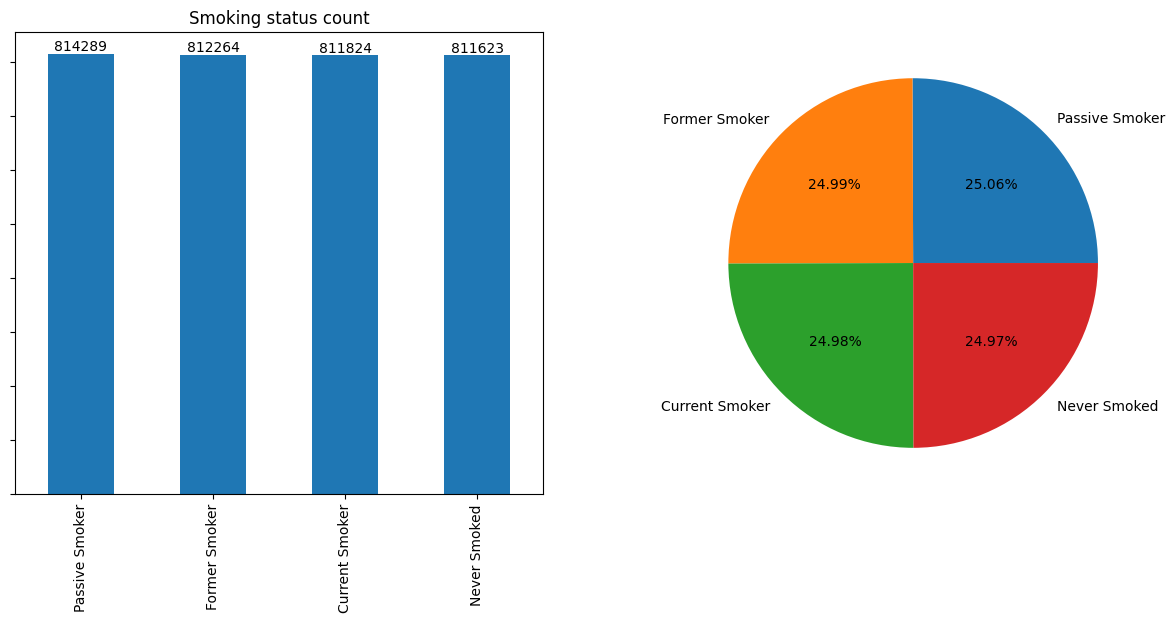

In [22]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
df["smoking_status"].value_counts().plot(kind="bar", ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")
axes[0].set_title("Smoking status count")
df["smoking_status"].value_counts().plot(kind="pie", ax=axes[1], autopct="%0.2f%%")
axes[1].set_ylabel("")
plt.show()

# Influence of smoking status on cancer survival

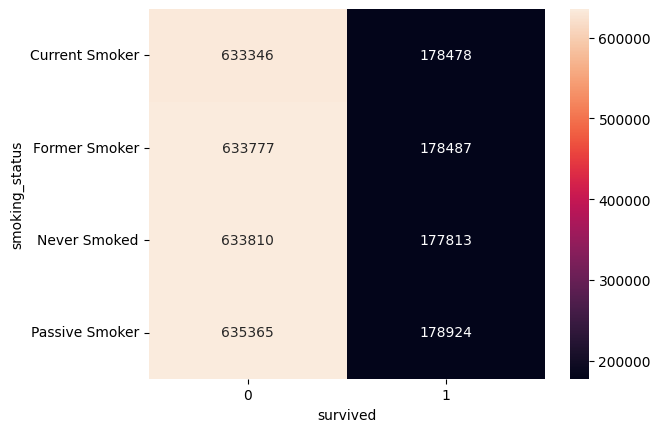

In [23]:
cross = pd.crosstab(df["smoking_status"], df["survived"])
sns.heatmap(cross, annot=True, fmt='d')
plt.show()

# 10 countries with highest BMI levels and cholesterol levels

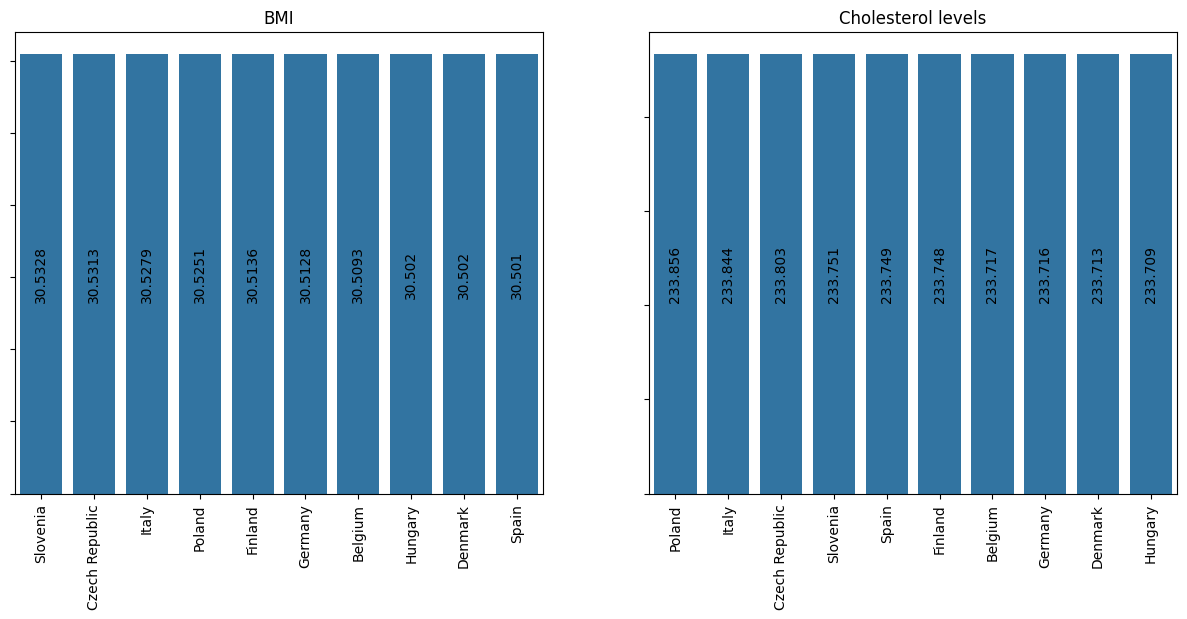

In [24]:
grouped = df.groupby("country")
bmi = pd.DataFrame(grouped["bmi"].mean()).sort_values("bmi", ascending=False)
chol = pd.DataFrame(grouped["cholesterol_level"].mean()).sort_values("cholesterol_level", ascending=False)
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
i = 0
sns.barplot(x=bmi.index[:10], y=bmi.iloc[:10, 0], ax=axes[i])
for container in axes[i].containers:
    axes[i].bar_label(container, rotation=90, label_type="center")
axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
axes[i].set_yticklabels(())
axes[i].set_ylabel("")
axes[i].set_xlabel("")
axes[i].set_title("BMI")
i += 1
sns.barplot(x=chol.index[:10], y=chol.iloc[:10, 0], ax=axes[i])
for container in axes[i].containers:
    axes[i].bar_label(container, rotation=90, label_type="center")
axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
axes[i].set_yticklabels(())
axes[i].set_ylabel("")
axes[i].set_xlabel("")
axes[i].set_title("Cholesterol levels")
plt.show()

# Data distribution of BMI and cholesterol levels for cases with lethal and non-lethal outcomes

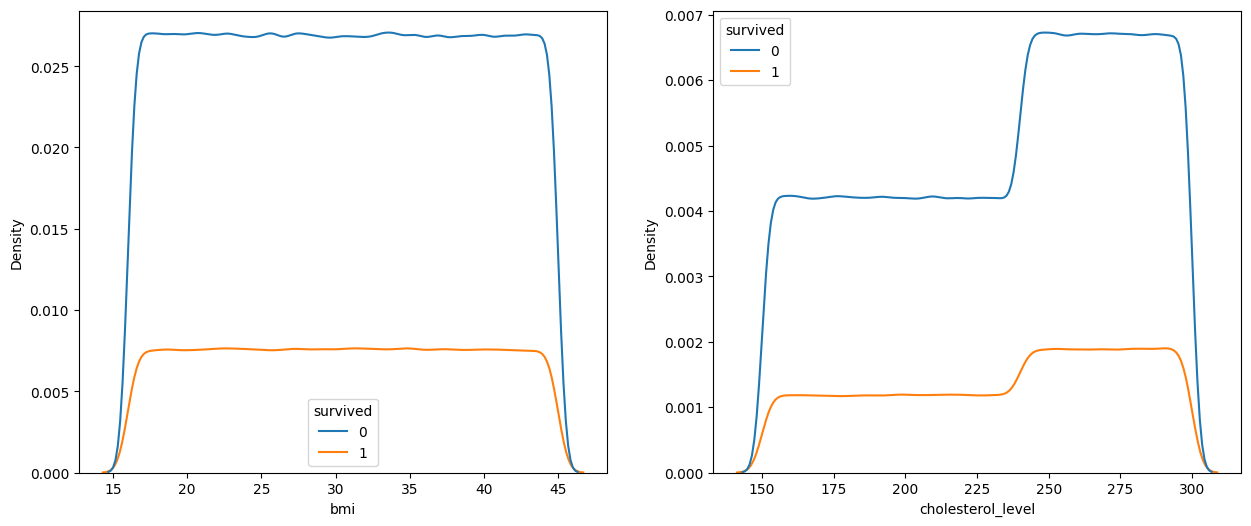

In [25]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

sns.kdeplot(df, x="bmi", hue="survived", ax=axes[0])
sns.kdeplot(df, x="cholesterol_level", hue="survived", ax=axes[1])
plt.show()

# Count of gender with lung cancer cases

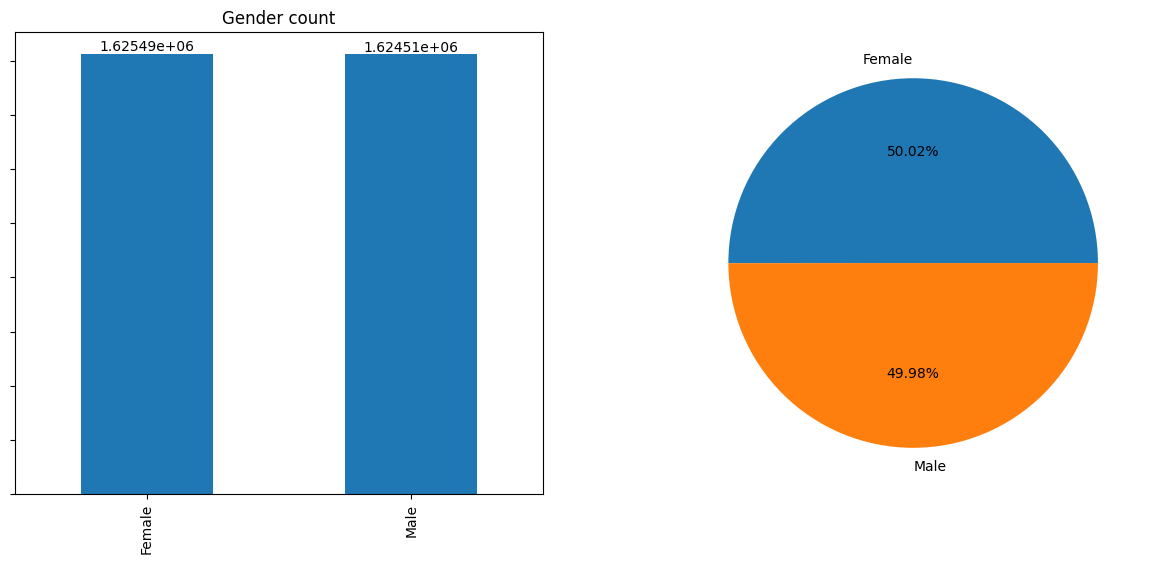

In [26]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
df["gender"].value_counts().plot(kind="bar", ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")
axes[0].set_title("Gender count")
df["gender"].value_counts().plot(kind="pie", ax=axes[1], autopct="%0.2f%%")
axes[1].set_ylabel("")
plt.show()

# Influence of gender on lung cancer

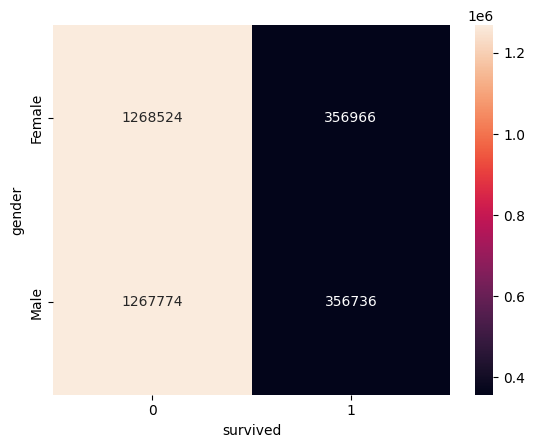

In [27]:
cross = pd.crosstab(df["gender"], df["survived"])
sns.heatmap(cross, annot=True, fmt='d')
plt.show()

# Average age in both genders to have lung cancer

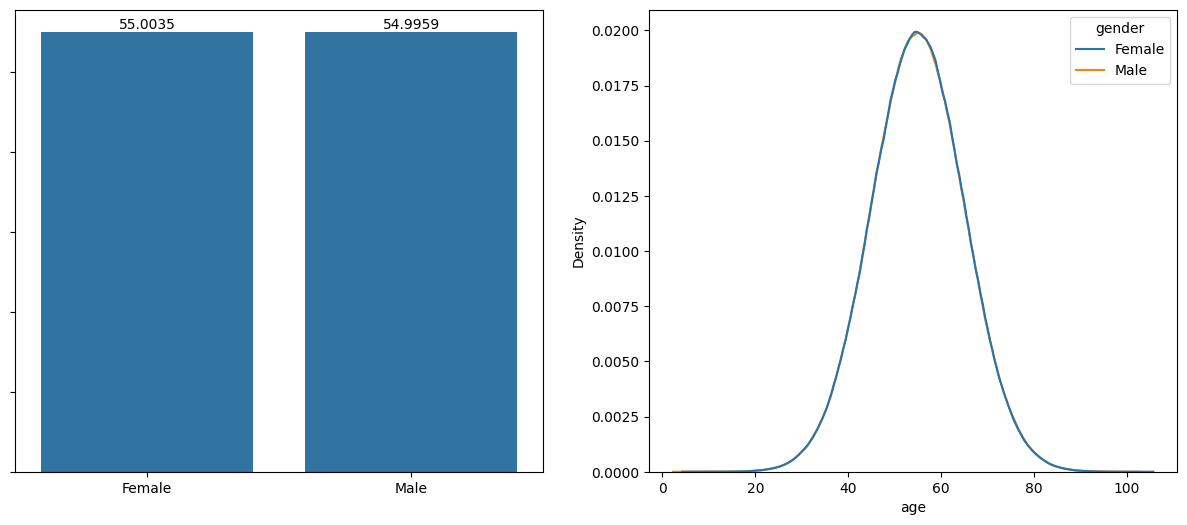

In [28]:
grouped = df.groupby("gender")
mean = grouped["age"].mean()
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.barplot(x=mean.index, y=mean, ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")

sns.kdeplot(df, x="age", hue="gender", ax=axes[1])

plt.show()

# Which gender has tendencies for various smoking statuses

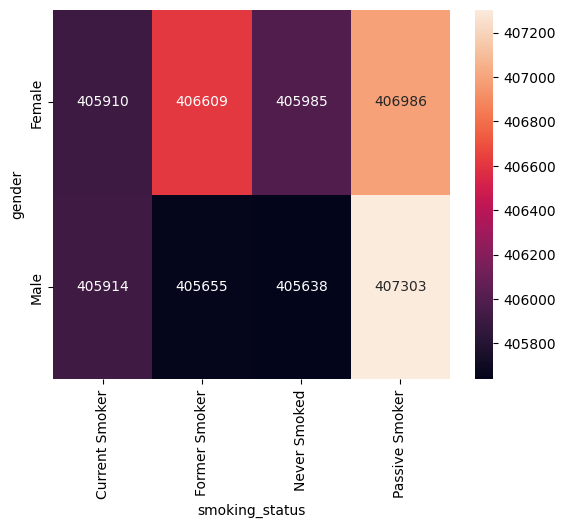

In [29]:
cross = pd.crosstab(df["gender"], df["smoking_status"])
sns.heatmap(cross, annot=True, fmt='d')
plt.show()

# Influence of other diagnoses on the outcome of treatment

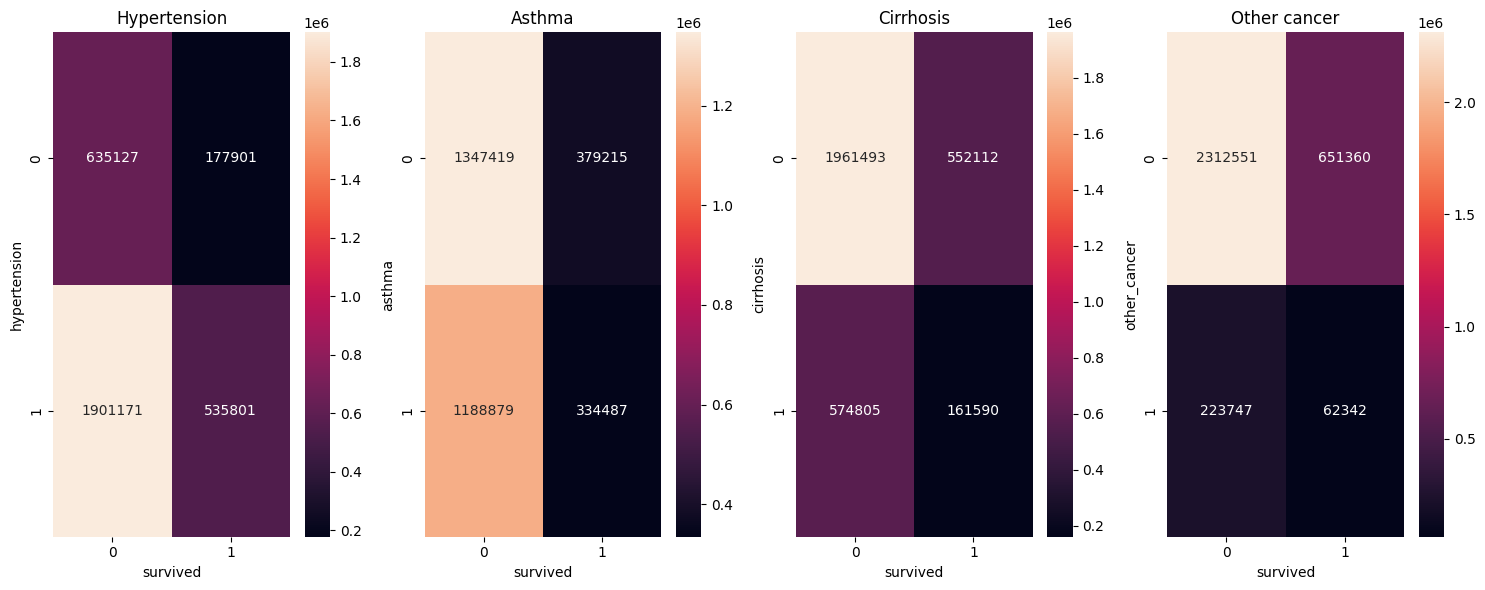

In [30]:
diseases = ["hypertension", "asthma", "cirrhosis", "other_cancer"]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))
for i, j in enumerate(diseases):
    cross = pd.crosstab(df[j], df["survived"])
    sns.heatmap(cross, annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(j.replace('_', ' ').capitalize())
plt.tight_layout()
plt.show()

# Treatment approaches tendencies

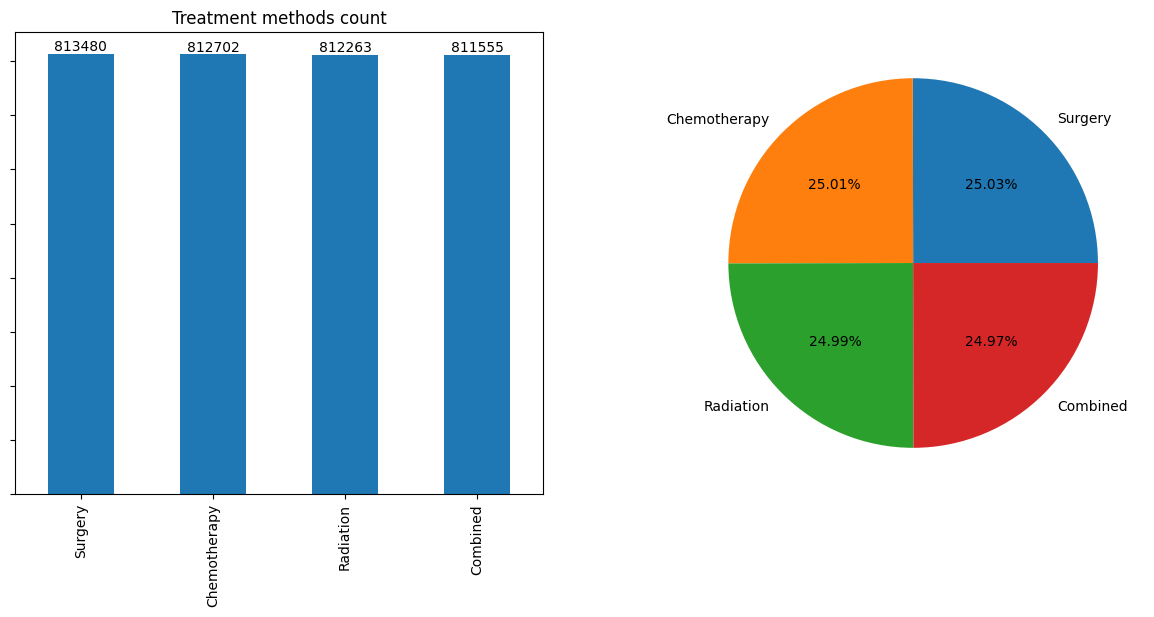

In [31]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
df["treatment_type"].value_counts().plot(kind="bar", ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")
axes[0].set_title("Treatment methods count")
df["treatment_type"].value_counts().plot(kind="pie", ax=axes[1], autopct="%0.2f%%")
axes[1].set_ylabel("")
plt.show()

# Influence of treatment type on the outcome

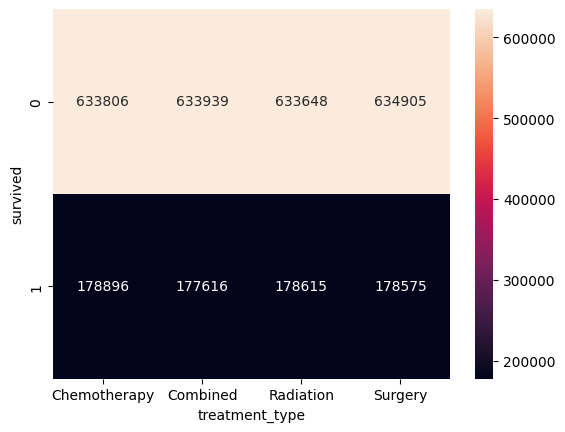

In [32]:
cross = pd.crosstab(df["survived"], df["treatment_type"])
sns.heatmap(cross, annot=True, fmt='d')
plt.show()

# Cases of lung cancer in family history influence on lung cancer occurence

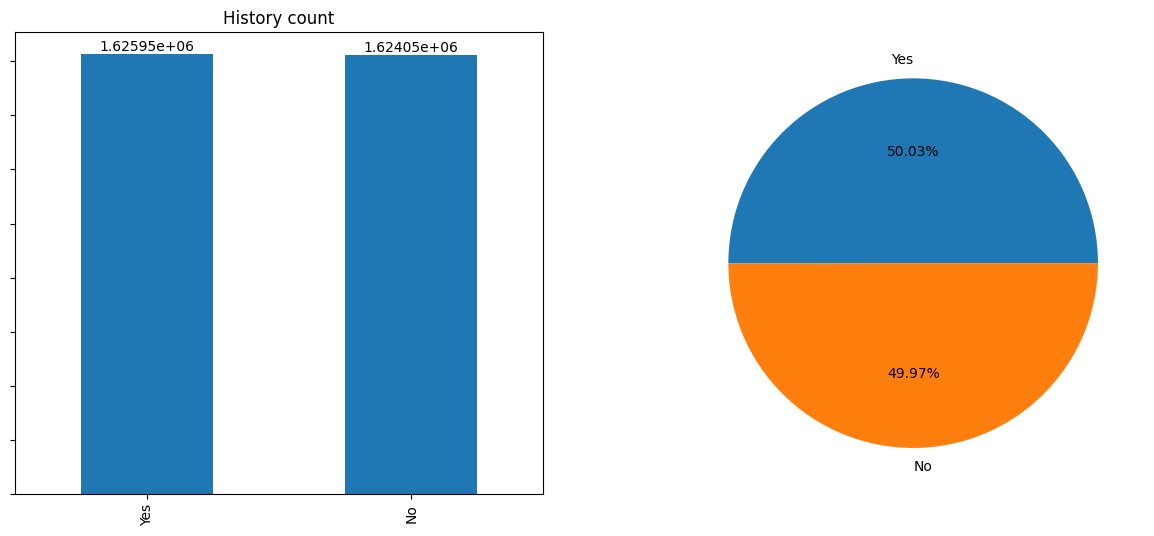

In [33]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
df["family_history"].value_counts().plot(kind="bar", ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")
axes[0].set_title("History count")
df["family_history"].value_counts().plot(kind="pie", ax=axes[1], autopct="%0.2f%%")
axes[1].set_ylabel("")
plt.show()

# Influence of family history on survival

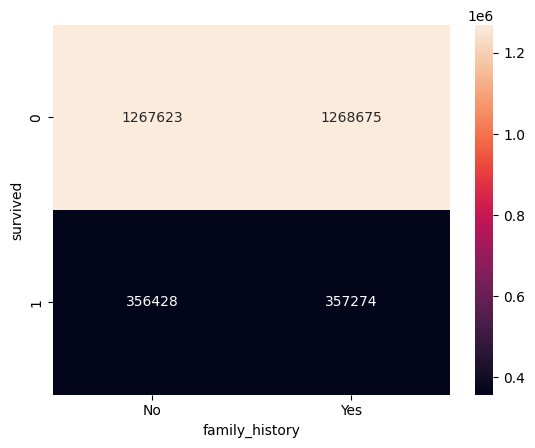

In [34]:
cross = pd.crosstab(df["survived"], df["family_history"])
sns.heatmap(cross, annot=True, fmt='d')
plt.show()

In [43]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from collections import Counter

# Encoding categorical variables

In [ ]:
categoricals = ["gender", "country", "cancer_stage", "family_history", "smoking_status", "treatment_type"]

le = LabelEncoder()
for i in categoricals:
    df[i] = le.fit_transform(df[i].values)

In [44]:
# Defining features (X) and target (y)
X = df.drop(["id", "diagnosis_date", "end_treatment_date", "survived", "beginning_of_treatment_date","country","gender","bmi","cholesterol_level", "hypertension"], axis=1).values
y = df.loc[:, "survived"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train a binary classification model
# Here, we'll use a few different models for comparison
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()

}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"\n{name} Results:")
    print("\n")



Model: Logistic Regression
Accuracy: 0.7803384615384615
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88    507220
           1       0.00      0.00      0.00    142780

    accuracy                           0.78    650000
   macro avg       0.39      0.50      0.44    650000
weighted avg       0.61      0.78      0.68    650000

Confusion Matrix:
[[507220      0]
 [142780      0]]

Logistic Regression Results:


Model: Decision Tree
Accuracy: 0.6422030769230769
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77    507220
           1       0.22      0.25      0.23    142780

    accuracy                           0.64    650000
   macro avg       0.50      0.50      0.50    650000
weighted avg       0.66      0.64      0.65    650000

Confusion Matrix:
[[382400 124820]
 [107748  35032]]

Decision Tree Results:


Model: Random Forest
Accuracy:

In [45]:
best_model = max(models, key=lambda x: accuracy_score(y_test, models[x].predict(X_test)))
print(f"Best Model: {best_model}")


Best Model: Logistic Regression


In [42]:
df.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'beginning_of_treatment_date', 'family_history', 'smoking_status',
       'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis',
       'other_cancer', 'treatment_type', 'end_treatment_date', 'survived',
       'days_of_treatment', 'diagnosis_period'],
      dtype='object')

In [46]:
new_data = pd.DataFrame({'age': [1, 2, 3], 'cancer_stage': [4, 5, 6], 'family_history': [7, 8, 9], 'smoking_status': [10, 11, 12],'asthma': [13, 14, 15], 'cirrhosis': [16, 17, 18],'other_cancer': [19, 20, 21], 'treatment_type': [22, 23, 24],'days_of_treatment': [25, 26, 27],  'diagnosis_period': [28, 29, 30] })
new_data = scaler.transform(new_data)
predictions = models[best_model].predict(new_data)
print(f"Predictions: {predictions}")

# Suggest better treatment methods based on the predicted survival chances
# This can be done by analyzing the predicted probabilities of survival
predicted_probabilities = models[best_model].predict_proba(new_data)
print(f"Predicted Probabilities: {predicted_probabilities}")

# For example, if the predicted probability of survival is high, suggest more aggressive treatment methods
if predicted_probabilities[0][1] > 0.7:
    print("Suggested Treatment: Aggressive chemotherapy and radiation therapy")
else:
    print("Suggested Treatment: Palliative care and symptom management")

Predictions: [0 0 0]
Predicted Probabilities: [[0.80889122 0.19110878]
 [0.81007682 0.18992318]
 [0.81125677 0.18874323]]
Suggested Treatment: Palliative care and symptom management


In [51]:
import pickle
pickle.dump(best_model,open('pred_model.pkl','wb'))

In [50]:
pickled_model = pickle.load(open('pred_model.pkl','rb'))

In [1]:
#pickled_model.predict()